<a href="https://colab.research.google.com/github/ioloi1128/IPCS_1111_modelling/blob/main/IPCS1111_Model_week4_Milankovitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Week 4
Milankovitch cycles

https://brian-rose.github.io/ClimateLaboratoryBook/courseware/orbital.html

Install climlab library

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()



In [ ]:
import condacolab
condacolab.check()
!conda install -c conda-forge climlab

1. Compare the asymmetriies between North Pole and South Pole

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from climlab import constants as const

In [ ]:
from climlab.solar.insolation import daily_insolation
days = np.linspace(0, const.days_per_year, 365)
Qnorth = daily_insolation(90,days)
Qsouth = daily_insolation(-90,days)
print( 'Daily average insolation at summer solstice:')
print( 'North Pole: %0.2f W/m2.' %np.max(Qnorth))
print( 'South Pole: %0.2f W/m2.' %np.max(Qsouth))

Daily average insolation at summer solstice:
North Pole: 525.31 W/m2.
South Pole: 562.03 W/m2.


Question 1: Why is asymmertric?

2. Past orbital variations

In [ ]:
from climlab.solar.orbital import OrbitalTable

In [ ]:
OrbitalTable

In [ ]:
kyears = np.arange( -1000., 1.)
orb = OrbitalTable.interp(kyear=kyears)
orb

Text(0.5, 1.0, 'Obliquity (axial tilt) $\\Phi$')

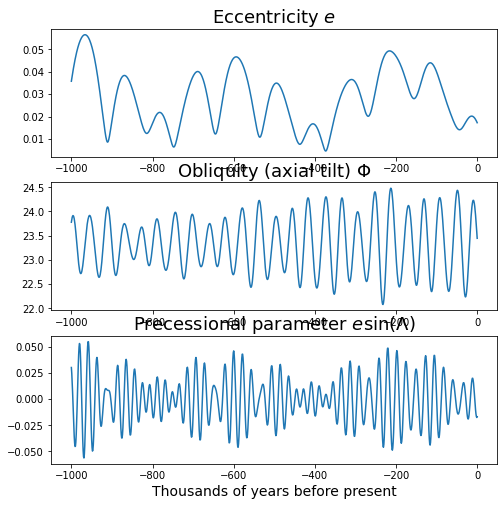

In [ ]:
fig = plt.figure( figsize = (8,8) )
ax1 = fig.add_subplot(3,1,1)
ax1.plot( kyears, orb['ecc'] )
ax1.set_title('Eccentricity $e$', fontsize=18 )
ax2 = fig.add_subplot(3,1,3)
ax2.plot( kyears, orb['ecc'] * np.sin( np.deg2rad( orb['long_peri'] ) ) )
ax2.set_title('Precessional parameter $e \sin(\Lambda)$', fontsize=18 )
ax2.set_xlabel( 'Thousands of years before present', fontsize=14 )
ax3 = fig.add_subplot(3,1,2)
ax3.plot( kyears, orb['obliquity'] )
ax3.set_title('Obliquity (axial tilt) $\Phi$', fontsize=18 )

Question 2:

a. What is the periodicities in three parameters?

b. Is there an interaction?

c. What is the current state? 

If "zero obliquity" ?

In [ ]:
from climlab.solar.insolation import daily_insolation

In [ ]:
thisorb = {'ecc':0., 'obliquity':0., 'long_peri':0.}

In [ ]:
days = np.linspace(1.,20.)/20 * const.days_per_year
daily_insolation(90, days, thisorb)

In [ ]:
daily_insolation(90, days)

The Last Glacial Maximum or “LGM” occurred around 23,000 years before present, when the ice sheets were at their greatest extent.

By 10,000 years ago, the ice sheets were mostly gone and the last ice age was over.

If the Milankovitch hypothesis is correct, we should see that summer insolation in the high northern latitudes increased substantially after the LGM.

The classical way to plot this is the look at insolation at summer solstice at 65ºN. Let’s plot this for the last 100,000 years.

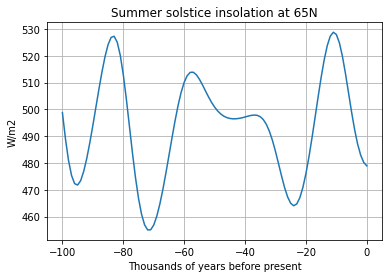

In [ ]:

#  Plot summer solstice insolation at 65ºN
years = np.linspace(-100, 0, 101)  #  last 100 kyr
thisorb = OrbitalTable.interp(kyear=years)
S65 = daily_insolation( 65, 172, thisorb )
fig, ax = plt.subplots()
ax.plot(years, S65)
ax.set_xlabel('Thousands of years before present')
ax.set_ylabel('W/m2')
ax.set_title('Summer solstice insolation at 65N')
ax.grid()

Question 3:

a. How much W/m2 difference between 23K and 10K?

b. What orbital factors favor high insolation at 65ºN at summer solstice?

3. Comparing insolation at 10 kyr and 23 kyr

In [ ]:
lat = np.linspace(-90, 90, 181)
days = np.linspace(1.,50.)/50 * const.days_per_year

orb_0 = OrbitalTable.interp(kyear=0)  # present-day orbital parameters
orb_10 = OrbitalTable.interp(kyear=-10)  # orbital parameters for 10 kyrs before present
orb_23 = OrbitalTable.interp(kyear=-23)   # 23 kyrs before present
Q_0 = daily_insolation( lat, days, orb_0 )    
Q_10 = daily_insolation( lat, days, orb_10 )   # insolation arrays for each of the three sets of orbital parameters
Q_23 = daily_insolation( lat, days, orb_23 )

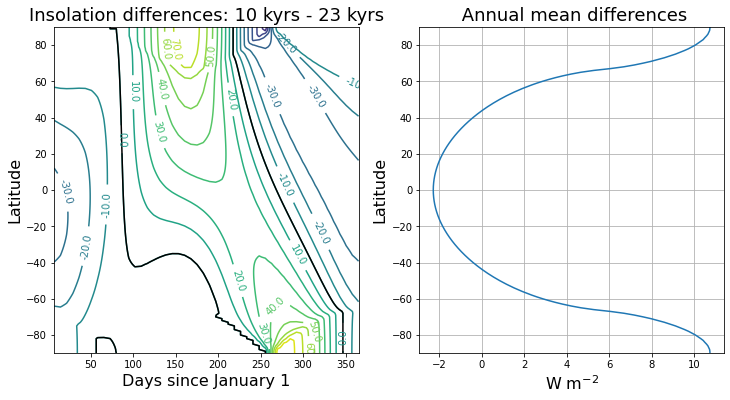

In [ ]:
fig = plt.figure( figsize=(12,6) )


ax1 = fig.add_subplot(1,2,1)
Qdiff = Q_10 - Q_23
CS1 = ax1.contour( days, lat, Qdiff, levels = np.arange(-100., 100., 10.) )
ax1.clabel(CS1, CS1.levels, inline=True, fmt='%r', fontsize=10)
ax1.contour( days, lat, Qdiff, levels = [0], colors='k' )
ax1.set_xlabel('Days since January 1', fontsize=16 )
ax1.set_ylabel('Latitude', fontsize=16 )
ax1.set_title('Insolation differences: 10 kyrs - 23 kyrs', fontsize=18 )

ax2 = fig.add_subplot(1,2,2)
ax2.plot( np.mean( Qdiff, axis=1 ), lat )
ax2.set_xlabel('W m$^{-2}$', fontsize=16 )
ax2.set_ylabel( 'Latitude', fontsize=16 )
ax2.set_title(' Annual mean differences', fontsize=18 )
ax2.set_ylim((-90,90))
ax2.grid()

Question 4: 

Please summarize the difference between 23 Kyear and 10 Kyear?

Finally, take the global average of the difference:

## code

In [ ]:
print( np.average(np.mean(Qdiff,axis=1), weights=np.cos(np.deg2rad(lat))) )

0.006510430783269779


##code end

Question 5:

What is the global average of the difference?

4. Understanding the effects of orbital variations on insolation

We are going to create a figure showing past time variations in three quantities:

Global, annual mean insolation

Annual mean insolation at high northern latitudes

Summer solstice insolation at high northern latitudes


In [ ]:
lat = np.linspace(-90, 90, 91)
num = 365.
days = np.linspace(1.,num,365)/num * const.days_per_year
Q = daily_insolation(lat, days, orb)
print( Q.shape)

(91, 365, 1001)


In [ ]:
Qann = np.mean(Q, axis=1)  # time average over the year
print( Qann.shape)
Qglobal = np.empty_like( kyears )
for n in range( kyears.size ):   # global area-weighted average
    Qglobal[n] = np.average( Qann[:,n], weights=np.cos(np.deg2rad(lat)))
print( Qglobal.shape)

(91, 1001)
(1001,)


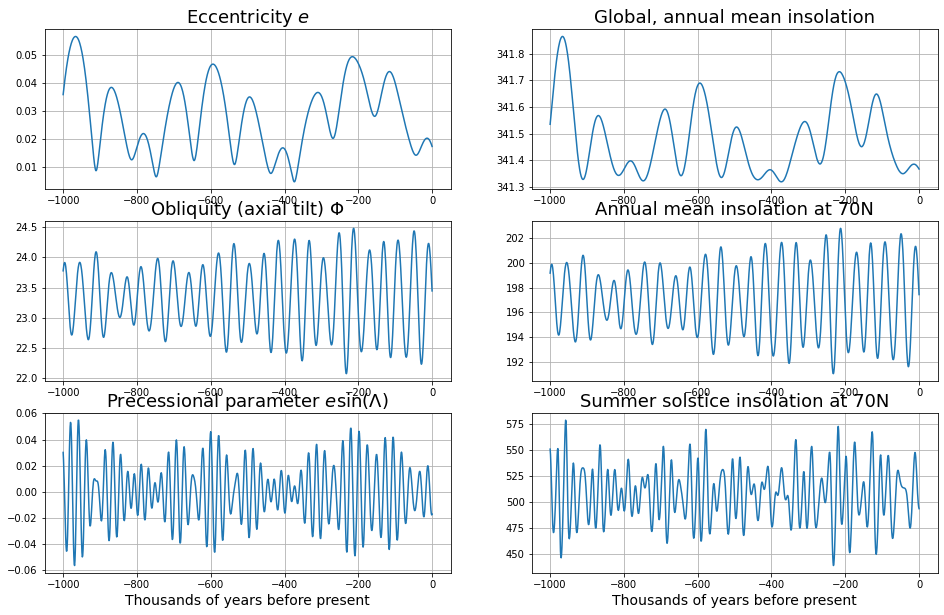

In [ ]:
fig = plt.figure(figsize = (16,10))
ax = []
for n in range(6):
    ax.append(fig.add_subplot(3,2,n+1))

ax[0].plot( kyears, orb['ecc'] )
ax[0].set_title('Eccentricity $e$', fontsize=18 )
ax[2].plot( kyears, orb['obliquity'] )
ax[2].set_title('Obliquity (axial tilt) $\Phi$', fontsize=18 )
ax[4].plot( kyears, orb['ecc'] * np.sin( np.deg2rad( orb['long_peri'] ) ) )
ax[4].set_title('Precessional parameter $e \sin(\Lambda)$', fontsize=18 )

ax[1].plot( kyears, Qglobal )
ax[1].set_title('Global, annual mean insolation', fontsize=18 )
ax[1].ticklabel_format( useOffset=False )

ax[3].plot( kyears, Qann[80,:] )
ax[3].set_title('Annual mean insolation at 70N', fontsize=18 )

ax[5].plot( kyears, Q[80,170,:] )
ax[5].set_title('Summer solstice insolation at 70N', fontsize=18 )

for n in range(6):
    ax[n].grid()
for n in [4,5]:
    ax[n].set_xlabel( 'Thousands of years before present', fontsize=14 )

Question 6:

a. What is the key factor for global annual mean insolation?

b. What is the key factor for annual mean insolation at 70N?

c. What is the key factor at summer solstice insolation at 70N?

d. How large is the impact of orbital parameters on insolation in a, b ,c?  

Question 7:

Can Milankovitch cycles explain Earth's current warming? 